# Plotting demo

In [3]:
import os
import glob
from pathlib import Path
import torch
import json
from safetensors.torch import load_file
import sys
import re
import numpy as np

import matplotlib.pyplot as plt

import torch.nn.functional as Fn

# Path setup
# For Jupyter Notebook compatibility
try:
    # Get current working directory and find project root
    project_root = Path.cwd()
    # Navigate up until we find the gpt-circuits directory
    while project_root.name != 'gpt-circuits' and project_root != project_root.parent:
        project_root = project_root.parent
    
    if project_root.name != 'gpt-circuits':
        # Fall back to the existing project_root if available
        if 'project_root' not in globals():
            print("Warning: Couldn't locate gpt-circuits directory. Using current directory.")
            project_root = Path.cwd()
    
    print(f"Project root: {project_root}")
    sys.path.append(str(project_root))
except Exception as e:
    print(f"Error setting up paths: {e}")

# Importing custom modules
from xavier.utils import load_experiments_and_extract_data, bootstrap_ci

str(Path.cwd())

Project root: /Users/xavierponicni/Documents/spar/gpt-circuits


'/Users/xavierponicni/Documents/spar/gpt-circuits/xavier/experiments'

## Plotting different SAE variants

In [ ]:
# DATA LOADING
exp_output = 'kl_divergence'
data_dir = Path.cwd() / 'data' / 'testing'
method_labels = ['standard', 'topk']
edge_sort = 'gradient'
layers = [0, 1]

# Colors for the plots
colors = ['ro-', 'go-', 'bo-', 'mo-', 'ko-', 'co-']

kl_values_list = []
feature_counts_list = []

for method in method_labels:
    # Load experiments and extract logits
    layer_logits_values, feature_counts = load_experiments_and_extract_data(
        exp_output,
        data_dir, 
        method,
        edge_sort,
        layers
    )
    
    # Store results
    kl_values_list.append(layer_logits_values)
    feature_counts_list.append(feature_counts)

Loaded 88 experiments from /Users/xavierponicni/Documents/spar/gpt-circuits/xavier/experiments/data/testing

Example experiment ID: magnitudes_standard_gradient_1_203892_2025-04-01
Available tensor keys: ['feature_magnitudes', 'kl_divergence', 'logits']
Feature magnitudes shape: torch.Size([1, 128, 512])
Logits shape: torch.Size([1, 128, 128])
KL divergence shape: torch.Size([1, 128])
Loaded 88 experiments from /Users/xavierponicni/Documents/spar/gpt-circuits/xavier/experiments/data/testing

Example experiment ID: magnitudes_standard_gradient_1_203892_2025-04-01
Available tensor keys: ['feature_magnitudes', 'kl_divergence', 'logits']
Feature magnitudes shape: torch.Size([1, 128, 512])
Logits shape: torch.Size([1, 128, 128])
KL divergence shape: torch.Size([1, 128])


<Figure size 1000x600 with 0 Axes>

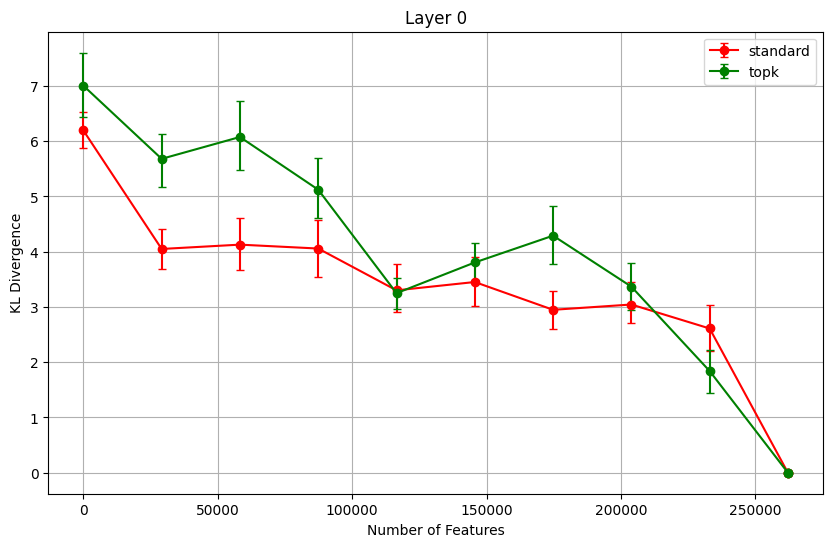

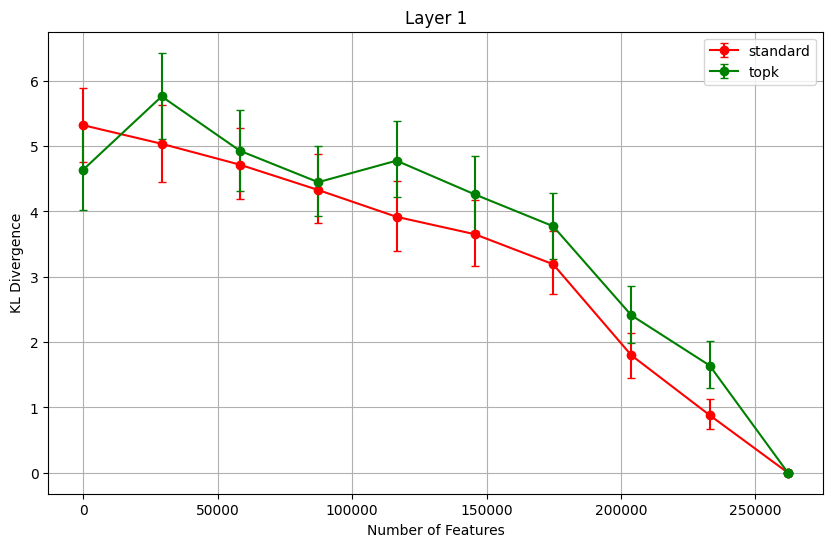

In [ ]:
# PLOTTING

# If token_idx is not None, average over all token positions
token_idx = None 

# Lists to store results
mean_values = []
yerr_lower_values = []
yerr_upper_values = []

# Calculate statistics
for layer_idx in range(len(layers)):
    layer_means = []
    layer_yerr_lower = []
    layer_yerr_upper = []
    
    for method_idx in range(len(method_labels)):
        method_means = []
        method_yerr_lower = []
        method_yerr_upper = []
        
        for edge_idx in range(len(feature_counts_list[method_idx])):
            # If token_idx is not None, average over all token positions
            if token_idx is None:
                # Flatten the tensor to average over all dimensions
                tensor = kl_values_list[method_idx][layer_idx][edge_idx]
                flat_data = tensor.flatten()
                if isinstance(flat_data, torch.Tensor):
                    flat_data = flat_data.numpy()
            else:
                # Flatten the tensor to average over specific token positions
                tensor = kl_values_list[method_idx][layer_idx][edge_idx][:, token_idx]
                flat_data = tensor.flatten()
                if isinstance(flat_data, torch.Tensor):
                    flat_data = flat_data.numpy()
            
            # Compute mean and confidence interval
            mean_value = np.mean(flat_data)
            lower_ci, upper_ci = bootstrap_ci(flat_data)
            yerr_lower = mean_value - lower_ci
            yerr_upper = upper_ci - mean_value
            
            # Store values
            method_means.append(mean_value)
            method_yerr_lower.append(yerr_lower)
            method_yerr_upper.append(yerr_upper)
        
        layer_means.append(method_means)
        layer_yerr_lower.append(method_yerr_lower)
        layer_yerr_upper.append(method_yerr_upper)
    
    mean_values.append(layer_means)
    yerr_lower_values.append(layer_yerr_lower)
    yerr_upper_values.append(layer_yerr_upper)

# Plot results for each layer
plt.figure(figsize=(10, 6))
for layer_idx in range(len(layers)):
    plt.figure(figsize=(10, 6))
    for method_idx in range(len(method_labels)):
        plt.errorbar(
            feature_counts_list[method_idx], 
            mean_values[layer_idx][method_idx],
            yerr=[yerr_lower_values[layer_idx][method_idx], yerr_upper_values[layer_idx][method_idx]],
            fmt=colors[method_idx],
            capsize=3,
            label=method_labels[method_idx]
        )
    
    plt.xlabel('Number of Features')
    plt.ylabel('KL Divergence')
    plt.title(f'Layer {layers[layer_idx]}')
    plt.legend()
    plt.grid(True)
    plt.show()

## Plotting different edge selection variants

In [6]:
# DATA LOADING
exp_output = 'kl_divergence'
data_dir = Path.cwd() / 'data' / 'testing'
sae_variant = 'standard'
method_labels = ['random', 'gradient']
layers = [0, 1]

# Colors for the plots
colors = ['ro-', 'go-', 'bo-', 'mo-', 'ko-', 'co-']

kl_values_list = []
feature_counts_list = []

for method in method_labels:
    # Load experiments and extract logits
    layer_logits_values, feature_counts = load_experiments_and_extract_data(
        exp_output,
        data_dir, 
        sae_variant,
        method,
        layers
    )
    
    # Store results
    kl_values_list.append(layer_logits_values)
    feature_counts_list.append(feature_counts)

Loaded 88 experiments from /Users/xavierponicni/Documents/spar/gpt-circuits/xavier/experiments/data/testing

Example experiment ID: magnitudes_standard_gradient_1_203892_2025-04-01
Available tensor keys: ['feature_magnitudes', 'kl_divergence', 'logits']
Feature magnitudes shape: torch.Size([1, 128, 512])
Logits shape: torch.Size([1, 128, 128])
KL divergence shape: torch.Size([1, 128])
Loaded 88 experiments from /Users/xavierponicni/Documents/spar/gpt-circuits/xavier/experiments/data/testing

Example experiment ID: magnitudes_standard_gradient_1_203892_2025-04-01
Available tensor keys: ['feature_magnitudes', 'kl_divergence', 'logits']
Feature magnitudes shape: torch.Size([1, 128, 512])
Logits shape: torch.Size([1, 128, 128])
KL divergence shape: torch.Size([1, 128])


<Figure size 1000x600 with 0 Axes>

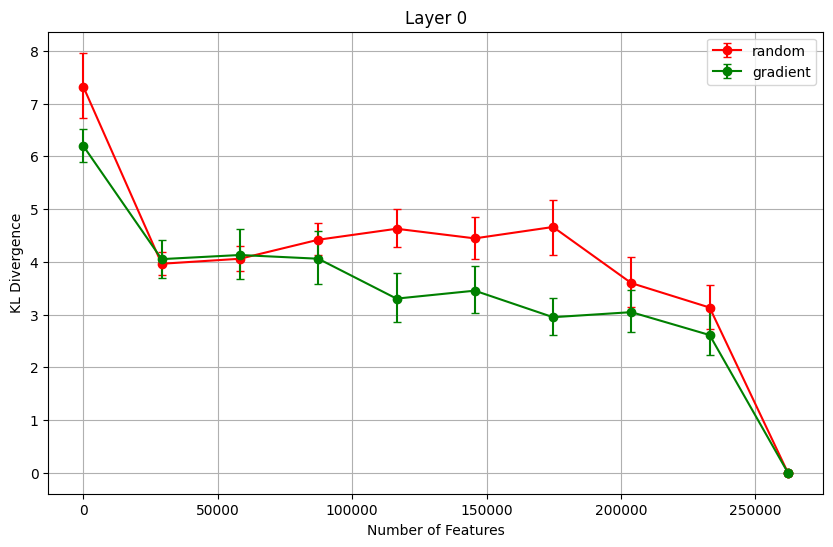

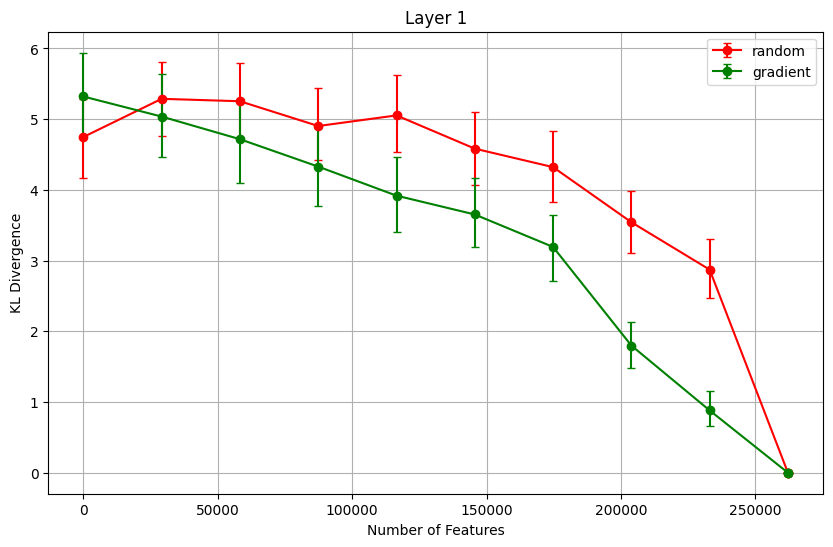

In [7]:
# PLOTTING

# If token_idx is not None, average over all token positions
token_idx = None 

# Lists to store results
mean_values = []
yerr_lower_values = []
yerr_upper_values = []

# Calculate statistics
for layer_idx in range(len(layers)):
    layer_means = []
    layer_yerr_lower = []
    layer_yerr_upper = []
    
    for method_idx in range(len(method_labels)):
        method_means = []
        method_yerr_lower = []
        method_yerr_upper = []
        
        for edge_idx in range(len(feature_counts_list[method_idx])):
            # If token_idx is not None, average over all token positions
            if token_idx is None:
                # Flatten the tensor to average over all dimensions
                tensor = kl_values_list[method_idx][layer_idx][edge_idx]
                flat_data = tensor.flatten()
                if isinstance(flat_data, torch.Tensor):
                    flat_data = flat_data.numpy()
            else:
                # Flatten the tensor to average over specific token positions
                tensor = kl_values_list[method_idx][layer_idx][edge_idx][:, token_idx]
                flat_data = tensor.flatten()
                if isinstance(flat_data, torch.Tensor):
                    flat_data = flat_data.numpy()
            
            # Compute mean and confidence interval
            mean_value = np.mean(flat_data)
            lower_ci, upper_ci = bootstrap_ci(flat_data)
            yerr_lower = mean_value - lower_ci
            yerr_upper = upper_ci - mean_value
            
            # Store values
            method_means.append(mean_value)
            method_yerr_lower.append(yerr_lower)
            method_yerr_upper.append(yerr_upper)
        
        layer_means.append(method_means)
        layer_yerr_lower.append(method_yerr_lower)
        layer_yerr_upper.append(method_yerr_upper)
    
    mean_values.append(layer_means)
    yerr_lower_values.append(layer_yerr_lower)
    yerr_upper_values.append(layer_yerr_upper)

# Plot results for each layer
plt.figure(figsize=(10, 6))
for layer_idx in range(len(layers)):
    plt.figure(figsize=(10, 6))
    for method_idx in range(len(method_labels)):
        plt.errorbar(
            feature_counts_list[method_idx], 
            mean_values[layer_idx][method_idx],
            yerr=[yerr_lower_values[layer_idx][method_idx], yerr_upper_values[layer_idx][method_idx]],
            fmt=colors[method_idx],
            capsize=3,
            label=method_labels[method_idx]
        )
    
    plt.xlabel('Number of Features')
    plt.ylabel('KL Divergence')
    plt.title(f'Layer {layers[layer_idx]}')
    plt.legend()
    plt.grid(True)
    plt.show()